In [13]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
from PIL import ImageDraw
import random

In [4]:
#pretrain-unichart dataset 다운로드
ds = load_dataset("ahmed-masry/unichart-pretrain-data")

/Users/hwany/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# 데이터셋 정보 출력
print(ds)

DatasetDict({
    train: Dataset({
        features: ['imgname', 'query', 'label'],
        num_rows: 6898333
    })
})


In [6]:
# 데이터셋 스플릿 정보 출력
print("Splits:", ds.keys())
# sample 1개 출력해보기
if 'train' in ds:
    print("First sample from train split:", ds['train'][0])

Splits: dict_keys(['train'])
First sample from train split: {'imgname': 'neural_caption_51.png', 'query': '<opencqa> What does fppi stand for?', 'label': 'the following graph describes how the fppi (farm product price index) about production of eggs in shell in canada has been slowly increasing during 2017. in particular, it increased from 1362 in february to 1371 in december. a line chart about the global growth and punctual drops of the monthly egg production in canada, 2017. this graph depicts the production of eggs in shell in canada during 2017. the unit is farm product price index (fppi). production starts off at approximately 1363 in january and goes down to the lowest production at 1362 during february. during the months of march and may the production remains unchanged at 1365. there is a slight increase of production during june, until it remain stable throughout july until september at 1367. then, a small drop can be observed, which is followed by a sharp increase, until it 

In [7]:
# 이미지 데이터셋 로드
image_dataset = load_dataset("ahmed-masry/UniChart-pretrain-images")

In [8]:
# 데이터셋의 첫 번째 샘플 구조 확인
print(image_dataset)

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 611934
    })
})


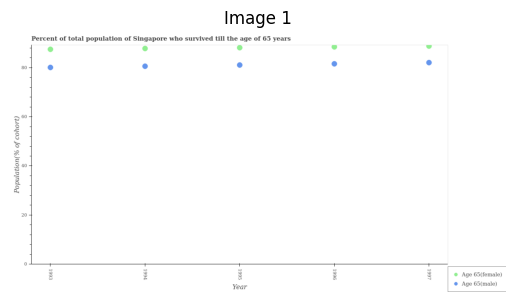

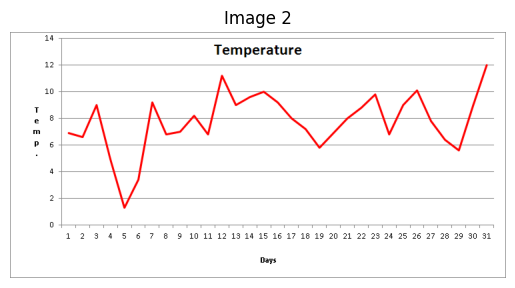

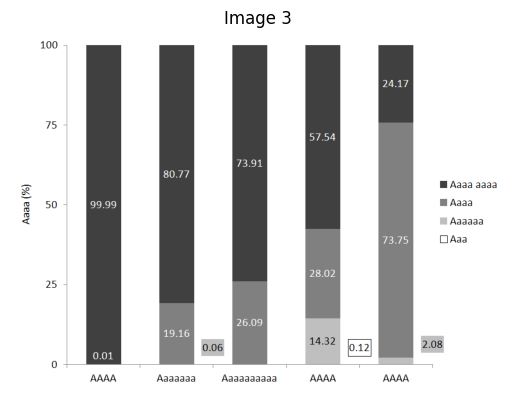

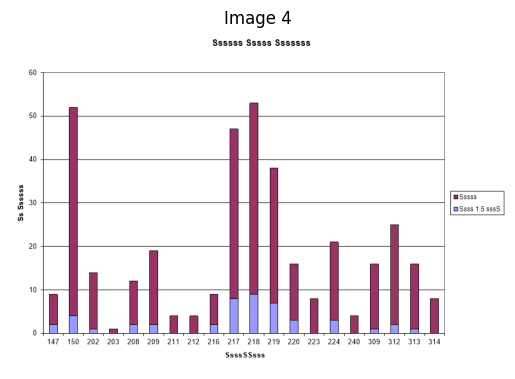

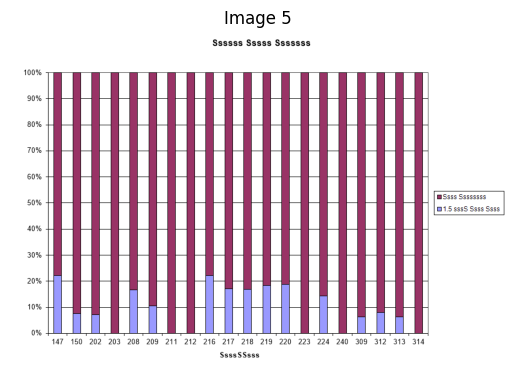

In [9]:
# original image 출력

# 시각화할 이미지 수 설정 (예: 5개)
num_images_to_display = 5

# 첫 번째 스플릿에서 이미지 추출 (예: train 스플릿)
split = 'train' if 'train' in image_dataset else list(image_dataset.keys())[0]

# 이미지 시각화
for i in range(num_images_to_display):
    # 이미지 데이터 추출
    img = image_dataset[split][i]['image']  # 'image' 필드에서 PIL 객체 추출
    
    # 이미지 출력
    plt.figure()
    plt.imshow(img)
    plt.title(f'Image {i+1}')
    plt.axis('off')  # 축 표시 제거

plt.show()


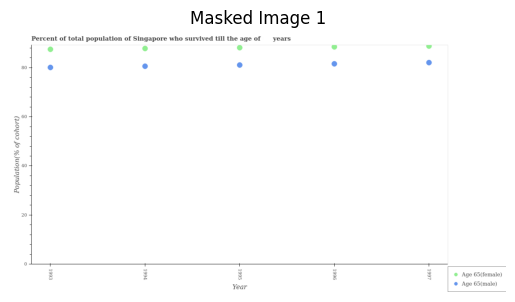

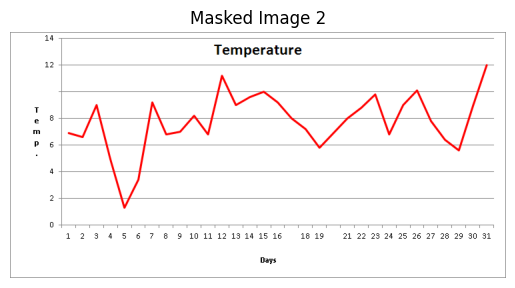

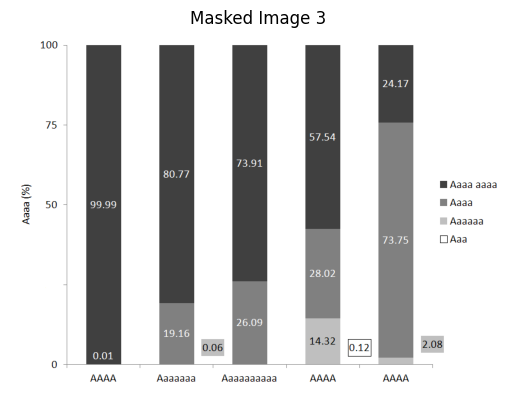

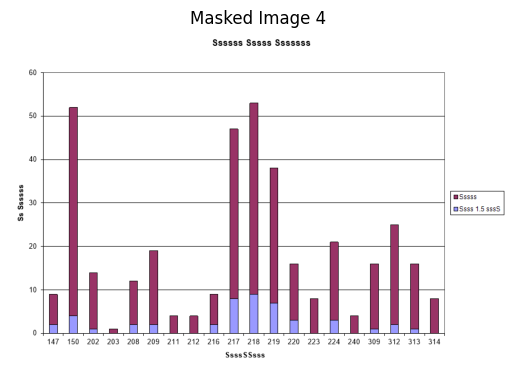

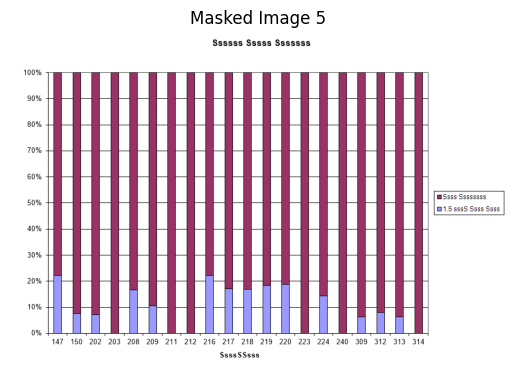

In [14]:
# Tesseract OCR 설치 경로 설정 (설치된 경로에 맞게 변경)
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract' 


# 시각화할 이미지 수 설정
num_images_to_display = 5
split = 'train' if 'train' in image_dataset else list(image_dataset.keys())[0]

def mask_random_numbers_in_image(img, mask_percentage=0.15):
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    
    # OCR 처리
    d = pytesseract.image_to_data(img_cv, output_type=pytesseract.Output.DICT)

    # 숫자 인식된 부분 찾기
    n_boxes = len(d['level'])
    number_boxes = []
    for i in range(n_boxes):
        if d['text'][i].isdigit():  # 숫자 부분만 선택
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            number_boxes.append((x, y, w, h))

    # 마스킹할 숫자 개수 계산 및 제한
    if number_boxes:
        num_to_mask = max(1, min(len(number_boxes), int(len(number_boxes) * mask_percentage)))
        boxes_to_mask = random.sample(number_boxes, num_to_mask)

        # 마스킹 적용
        draw = ImageDraw.Draw(img)
        for (x, y, w, h) in boxes_to_mask:
            draw.rectangle([x, y, x + w, y + h], fill="white")  # 흰색으로 마스킹

    return img

# 이미지 시각화 및 마스킹 적용
for i in range(num_images_to_display):
    img = image_dataset[split][i]['image']  # 'image' 필드에서 PIL 객체 추출
    masked_img = mask_random_numbers_in_image(img)  # 숫자 마스킹 적용
    
    plt.figure()
    plt.imshow(masked_img)
    plt.title(f'Masked Image {i+1}')
    plt.axis('off')  # 축 표시 제거

plt.show()

# => 4,5번 같은 곳에서는 숫자 마스킹이 제대로 안됨 


In [8]:
# 이미지 sample별 크기를 출력

num_images_to_display = 5
split = 'train' if 'train' in image_dataset else list(image_dataset.keys())[0]

# 각 이미지 샘플의 크기 출력
for i in range(num_images_to_display):
    img = image_dataset[split][i]['image']  # 'image' 필드에서 PIL 객체 추출
    width, height = img.size
    print(f'Image {i+1} size: {width}x{height}')

Image 1 size: 1239x650
Image 2 size: 744x369
Image 3 size: 910x660
Image 4 size: 901x613
Image 5 size: 901x613
